# Optimizing Fantasy Premier League Success: 
## A Comprehensive Data-Driven Analysis of Player Performance and Strategies

## Introduction

The Fantasy Premier League, popularly known as FPL, has emerged as the leading fantasy football game in the sporting world, boasting an impressive **player base of over 11.5 million enthusiasts in the year 2023**. Established by the International Sports Multimedia (ISM), this captivating game is under the ownership and operation of the Premier League itself.

Originally introduced in 2002 for the 2002-03 Premier League season, the Fantasy Premier League made its debut alongside the launch of the Premier League website, marking a new era of interactive engagement for football fans. During its initial season, the game attracted 76.2 thousand eager participants, with the coveted 1st position granting the winner an exclusive VIP trip to witness a thrilling Premier League match of their choice.
***
In this project, we implement data analysis to find the best players to choose for a fantasy football team by looking at their stats from the last season. Implementing data analysis for fantasy football team selection involves utilizing various statistical techniques to assess **player performance** and make informed decisions. By analyzing the players' **statistics from the previous season**, you can gain valuable insights that contribute to creating a competitive and well-balanced fantasy football team.

## Rules

### Squad Size

"Squad Size" refers to the total number of players that a participant should select for their fantasy football team. In this particular context, the squad size is 15 players. This means that when joining the fantasy football game, each participant is required to create a team of 15 players based on the following position requirements:

- **2 Goalkeepers:** These players are responsible for guarding the goal and preventing the opposing team from scoring.

- **5 Defenders:** Defenders form the backbone of the team's defense, working to prevent the opposing team's attackers from scoring goals.

- **5 Midfielders:** Midfielders play a crucial role in controlling the game, often involved in both offensive and defensive plays.

- **3 Forwards:** Forwards are primarily responsible for scoring goals and putting pressure on the opposing team's defense.

By adhering to these squad size and position requirements, participants are compelled to create a well-balanced team that covers all key areas of the game.

_Note: There is also a budget consideration, but we will not delve into that aspect of the game in this analysis._

- Ways for each position to earn points
- Data Exploration
- Data Analysis
- Outstanding Players
- Conclusion

### Scoring Points

Throughout the duration of the season, participating fantasy football players will earn points based on their individual performances within the Premier League matches. These points are allocated according to various criteria such as goals scored, assists provided, clean sheets, and other notable contributions during the games. Each player's performance directly influences the points they accumulate, thereby shaping their overall standing in the fantasy league and affecting their team's position in the competition.

<center>During the season, fantasy football players will be allocated points based on their performance in the Premier League.</center>

| Action | Points |
| :-- | --: |
| For playing up to 60 minutes | 1 |
| For playing 60 minutes or more (excluding stoppage time) | 2 |
| For each goal scored by a goalkeeper or defender | 6 |
| For each goal scored by a midfielder | 5 |
| For each goal scored by a forward | 4 |
| For each goal assist | 3 |
| For a clean sheet by a goalkeeper or defender | 4 |
| For a clean sheet by a midfielder | 1 |
| For every 3 shot saves by a goalkeeper | 1 |
| For each penalty save | 5 |
| For each penalty miss | -2 |
| Bonus points for the best players in a match | 1-3 |
| For every 2 goals conceded by a goalkeeper or defender | -1 |
| For each yellow card | -1 |
| For each red card | -3 |
| For each own goal | -2 |</center>

Those are the ways for players to earn points each matchweek. We will divide each of these categories by the positions of the players and try to generate a aggregate measure that will help us to choose players for each position.

We will measure each position by the required stats as shown below;

Goalkeepers
- Clean Sheets
- Saves
- Penalty Saves
- Goals Conceded
- Yellow Card
- Red Card
- Own Goal

Defenders
- Goals
- Assists
- Goals Conceded
- Yellow Card
- Red Card
- Own Goal

Midfielders
- Goals
- Assists
- Penalty Miss
- Yellow Card
- Red Card
- Own Goal

Forwards
- Goals
- Assists
- Penalty Miss
- Yellow Card
- Red Card
- Own Goal

## Data Exploration

As part of our comprehensive data analysis process, we will embark on a meticulous journey of data exploration, delving deep into each dataset to uncover and extract the essential statistical information that is pertinent to our research objectives. Through a systematic examination of the data, we aim to reveal meaningful insights that will enable us to make informed decisions and draw conclusive inferences. Furthermore, after thoroughly scrutinizing and analyzing each dataset, we will strategically merge the individual dataframes into a unified and comprehensive dataset. This amalgamated dataframe will serve as a consolidated and valuable resource.

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting our data from fbref website
standard_stats = 'https://fbref.com/en/comps/Big5/2022-2023/stats/players/2022-2023-Big-5-European-Leagues-Stats'
goalkeeper_stats = 'https://fbref.com/en/comps/Big5/2022-2023/keepers/players/2022-2023-Big-5-European-Leagues-Stats'
miscellaneous_stats = 'https://fbref.com/en/comps/Big5/2022-2023/misc/players/2022-2023-Big-5-European-Leagues-Stats'
playing_stats = 'https://fbref.com/en/comps/Big5/2022-2023/playingtime/players/2022-2023-Big-5-European-Leagues-Stats'
shooting_stats = 'https://fbref.com/en/comps/Big5/2022-2023/shooting/players/2022-2023-Big-5-European-Leagues-Stats'

In [3]:
# creating our first dataframe (standard stats)
df_1 = pd.read_html(standard_stats)[0]

In [4]:
df_1.head(2)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1   Brenden Aaronson             us USA              MF,FW   
1                  2    Paxten Aaronson             us USA              MF,DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0       Leeds United  eng Premier League                 21   
1     Eint Frankfurt       de Bundesliga                 18   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           36     28  ...           0.11  0.15  0.04   
1               2003            7      0  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.15  0.15  0.16   0.31  0.15     0.31             Matches  
1   0.00  0.09  0.03   0.11  0.09     0.11             Matches  

[2 rows x 38 columns]

Now, we need to choose the required columns from this dataframe and make it ready for the inevitable merge.

In [5]:
# Combining the higher level with the lower level in the column index
df_1.columns = [f'{higher}_{lower}' for higher, lower in df_1.columns]

In [6]:
df_1.head(2)

,Unnamed: 0_level_0_Rk,Unnamed: 1_level_0_Player,Unnamed: 2_level_0_Nation,Unnamed: 3_level_0_Pos,Unnamed: 4_level_0_Squad,Unnamed: 5_level_0_Comp,Unnamed: 6_level_0_Age,Unnamed: 7_level_0_Born,Playing Time_MP,Playing Time_Starts,...,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Unnamed: 37_level_0_Matches
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,eng Premier League,21,2000,36,28,...,0.11,0.15,0.04,0.15,0.15,0.16,0.31,0.15,0.31,Matches
1,2,Paxten Aaronson,us USA,"MF,DF",Eint Frankfurt,de Bundesliga,18,2003,7,0,...,0.00,0.00,0.00,0.00,0.09,0.03,0.11,0.09,0.11,Matches


In [7]:
# looking at the columns
for column in df_1.columns:
    print(column)

Unnamed: 0_level_0_Rk
Unnamed: 1_level_0_Player
Unnamed: 2_level_0_Nation
Unnamed: 3_level_0_Pos
Unnamed: 4_level_0_Squad
Unnamed: 5_level_0_Comp
Unnamed: 6_level_0_Age
Unnamed: 7_level_0_Born
Playing Time_MP
Playing Time_Starts
Playing Time_Min
Playing Time_90s
Performance_Gls
Performance_Ast
Performance_G+A
Performance_G-PK
Performance_PK
Performance_PKatt
Performance_CrdY
Performance_CrdR
Expected_xG
Expected_npxG
Expected_xAG
Expected_npxG+xAG
Progression_PrgC
Progression_PrgP
Progression_PrgR
Per 90 Minutes_Gls
Per 90 Minutes_Ast
Per 90 Minutes_G+A
Per 90 Minutes_G-PK
Per 90 Minutes_G+A-PK
Per 90 Minutes_xG
Per 90 Minutes_xAG
Per 90 Minutes_xG+xAG
Per 90 Minutes_npxG
Per 90 Minutes_npxG+xAG
Unnamed: 37_level_0_Matches


By looking at the columns, we are trying to get the columns we need for our analysis.<br>
From this dataframe, we need to get 'player', 'position', 'team', 'goals', 'assists', 'yellow cards', and 'red cards'.


In [8]:
columns = ['Unnamed: 1_level_0_Player', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
          'Performance_Gls', 'Performance_Ast', 'Performance_CrdY', 'Performance_CrdR']

df_1 = df_1[columns]

In [9]:
# we rename the columns
df_1.columns = ['Name', 'Position', 'Team', 'Goals', 'Assists', 'Yellow_Cards', 'Red_Cards']

In [10]:
df_1.head(2)

,Name,Position,Team,Goals,Assists,Yellow_Cards,Red_Cards
0,Brenden Aaronson,"MF,FW",Leeds United,1,3,2,0
1,Paxten Aaronson,"MF,DF",Eint Frankfurt,0,0,1,0


We got what we want from the first dataframe, now let's go do it again for other dataframes.

In [11]:
# creating our second dataframe (goalkeeper stats)
df_2 = pd.read_html(goalkeeper_stats)[0]
# Combining the higher level with the lower level in the column index
df_2.columns = [f'{higher}_{lower}' for higher, lower in df_2.columns]
# looking at the columns
for column in df_2.columns:
    print(column)

Unnamed: 0_level_0_Rk
Unnamed: 1_level_0_Player
Unnamed: 2_level_0_Nation
Unnamed: 3_level_0_Pos
Unnamed: 4_level_0_Squad
Unnamed: 5_level_0_Comp
Unnamed: 6_level_0_Age
Unnamed: 7_level_0_Born
Playing Time_MP
Playing Time_Starts
Playing Time_Min
Unnamed: 11_level_0_90s
Performance_GA
Performance_GA90
Performance_SoTA
Performance_Saves
Performance_Save%
Performance_W
Performance_D
Performance_L
Performance_CS
Performance_CS%
Penalty Kicks_PKatt
Penalty Kicks_PKA
Penalty Kicks_PKsv
Penalty Kicks_PKm
Penalty Kicks_Save%
Unnamed: 27_level_0_Matches


From this dataframe, we need 'player', 'position', 'team', 'goals against per 90', 'saves', 'clean sheets', and 'penalties saved'.

In [12]:
columns = ['Unnamed: 1_level_0_Player', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
          'Performance_GA90', 'Performance_Saves', 'Performance_CS', 'Penalty Kicks_PKsv']

df_2 = df_2[columns]
df_2.columns = ['Name', 'Position', 'Team', 'Conceded_per_90', 'Saves', 'Clean_Sheets', 'Penalties_Saved']
df_2.head(2)

,Name,Position,Team,Conceded_per_90,Saves,Clean_Sheets,Penalties_Saved
0,Álvaro Aceves,GK,Valladolid,0.00,3,0,0
1,Julen Agirrezabala,GK,Athletic Club,0.80,13,2,0


In [13]:
# creating our third dataframe (miscellaneous stats)
df_3 = pd.read_html(miscellaneous_stats)[0]
# Combining the higher level with the lower level in the column index
df_3.columns = [f'{higher}_{lower}' for higher, lower in df_3.columns]
# looking at the columns
for column in df_3.columns:
    print(column)

Unnamed: 0_level_0_Rk
Unnamed: 1_level_0_Player
Unnamed: 2_level_0_Nation
Unnamed: 3_level_0_Pos
Unnamed: 4_level_0_Squad
Unnamed: 5_level_0_Comp
Unnamed: 6_level_0_Age
Unnamed: 7_level_0_Born
Unnamed: 8_level_0_90s
Performance_CrdY
Performance_CrdR
Performance_2CrdY
Performance_Fls
Performance_Fld
Performance_Off
Performance_Crs
Performance_Int
Performance_TklW
Performance_PKwon
Performance_PKcon
Performance_OG
Performance_Recov
Aerial Duels_Won
Aerial Duels_Lost
Aerial Duels_Won%
Unnamed: 25_level_0_Matches


What we need to get from this dataframe are 'player', 'position', 'team', 'own goals'.

In [14]:
columns = ['Unnamed: 1_level_0_Player', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
          'Performance_OG']

df_3 = df_3[columns]
df_3.columns = ['Name', 'Position', 'Team', 'Own_Goals']
df_3.head(2)

,Name,Position,Team,Own_Goals
0,Brenden Aaronson,"MF,FW",Leeds United,0
1,Paxten Aaronson,"MF,DF",Eint Frankfurt,0


In [15]:
# creating our fourth dataframe (playing stats)
df_4 = pd.read_html(playing_stats)[0]
# Combining the higher level with the lower level in the column index
df_4.columns = [f'{higher}_{lower}' for higher, lower in df_4.columns]
# looking at the columns
for column in df_4.columns:
    print(column)

Unnamed: 0_level_0_Rk
Unnamed: 1_level_0_Player
Unnamed: 2_level_0_Nation
Unnamed: 3_level_0_Pos
Unnamed: 4_level_0_Squad
Unnamed: 5_level_0_Comp
Unnamed: 6_level_0_Age
Unnamed: 7_level_0_Born
Playing Time_MP
Playing Time_Min
Playing Time_Mn/MP
Playing Time_Min%
Playing Time_90s
Starts_Starts
Starts_Mn/Start
Starts_Compl
Subs_Subs
Subs_Mn/Sub
Subs_unSub
Team Success_PPM
Team Success_onG
Team Success_onGA
Team Success_+/-
Team Success_+/-90
Team Success_On-Off
Team Success (xG)_onxG
Team Success (xG)_onxGA
Team Success (xG)_xG+/-
Team Success (xG)_xG+/-90
Team Success (xG)_On-Off
Unnamed: 30_level_0_Matches


What we need to get from this dataframe are 'player', 'position', 'team', 'goals conceded'.

In [16]:
columns = ['Unnamed: 1_level_0_Player', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
          'Team Success_onGA']

df_4 = df_4[columns]
df_4.columns = ['Name', 'Position', 'Team', 'Goals_Conceded']
df_4.head(2)

,Name,Position,Team,Goals_Conceded
0,Brenden Aaronson,"MF,FW",Leeds United,58
1,Paxten Aaronson,"MF,DF",Eint Frankfurt,0


In [17]:
# creating our fifth dataframe (shooting stats)
df_5 = pd.read_html(shooting_stats)[0]
# Combining the higher level with the lower level in the column index
df_5.columns = [f'{higher}_{lower}' for higher, lower in df_5.columns]
# looking at the columns
for column in df_5.columns:
    print(column)

Unnamed: 0_level_0_Rk
Unnamed: 1_level_0_Player
Unnamed: 2_level_0_Nation
Unnamed: 3_level_0_Pos
Unnamed: 4_level_0_Squad
Unnamed: 5_level_0_Comp
Unnamed: 6_level_0_Age
Unnamed: 7_level_0_Born
Unnamed: 8_level_0_90s
Standard_Gls
Standard_Sh
Standard_SoT
Standard_SoT%
Standard_Sh/90
Standard_SoT/90
Standard_G/Sh
Standard_G/SoT
Standard_Dist
Standard_FK
Standard_PK
Standard_PKatt
Expected_xG
Expected_npxG
Expected_npxG/Sh
Expected_G-xG
Expected_np:G-xG
Unnamed: 26_level_0_Matches


What we need to get from this dataframe are 'player', 'position', 'team', 'penalty kicks scored', 'penalty kicks attempted'.

In [18]:
columns = ['Unnamed: 1_level_0_Player', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
          'Standard_PK', 'Standard_PKatt']

df_5 = df_5[columns]
df_5.columns = ['Name', 'Position', 'Team', 'Penalty_Scored', 'Penalty_Attempted']
df_5.head(2)

,Name,Position,Team,Penalty_Scored,Penalty_Attempted
0,Brenden Aaronson,"MF,FW",Leeds United,0,0
1,Paxten Aaronson,"MF,DF",Eint Frankfurt,0,0


We create a 'penalty missed' column out of the columns we have.

In [19]:
# Convert the columns to numeric, coercing non-convertible values to NaN
df_5['Penalty_Attempted'] = pd.to_numeric(df_5['Penalty_Attempted'], errors='coerce')
df_5['Penalty_Scored'] = pd.to_numeric(df_5['Penalty_Scored'], errors='coerce')

In [20]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3004 non-null   object 
 1   Position           3004 non-null   object 
 2   Team               3004 non-null   object 
 3   Penalty_Scored     2889 non-null   float64
 4   Penalty_Attempted  2889 non-null   float64
dtypes: float64(2), object(3)
memory usage: 117.5+ KB


In [21]:
df_5['Penalty_Missed'] = df_5['Penalty_Attempted'] - df_5['Penalty_Scored']

In [22]:
# Dropping the 'column1' and 'column2' from the DataFrame
df_5 = df_5.drop(['Penalty_Attempted', 'Penalty_Scored'], axis=1)

In [23]:
df_5.head(2)

,Name,Position,Team,Penalty_Missed
0,Brenden Aaronson,"MF,FW",Leeds United,0.0
1,Paxten Aaronson,"MF,DF",Eint Frankfurt,0.0


### Converting all stats into numeric

Let's convert all the required values into numeric.

In [24]:
df_1['Goals'] = pd.to_numeric(df_1['Goals'], errors='coerce')
df_1['Assists'] = pd.to_numeric(df_1['Assists'], errors='coerce')
df_1['Yellow_Cards'] = pd.to_numeric(df_1['Yellow_Cards'], errors='coerce')
df_1['Red_Cards'] = pd.to_numeric(df_1['Red_Cards'], errors='coerce')

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3004 non-null   object 
 1   Position      3004 non-null   object 
 2   Team          3004 non-null   object 
 3   Goals         2889 non-null   float64
 4   Assists       2889 non-null   float64
 5   Yellow_Cards  2889 non-null   float64
 6   Red_Cards     2889 non-null   float64
dtypes: float64(4), object(3)
memory usage: 164.4+ KB


In [26]:
df_2['Conceded_per_90'] = pd.to_numeric(df_2['Conceded_per_90'], errors='coerce')
df_2['Saves'] = pd.to_numeric(df_2['Saves'], errors='coerce')
df_2['Clean_Sheets'] = pd.to_numeric(df_2['Clean_Sheets'], errors='coerce')
df_2['Penalties_Saved'] = pd.to_numeric(df_2['Penalties_Saved'], errors='coerce')

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             216 non-null    object 
 1   Position         216 non-null    object 
 2   Team             216 non-null    object 
 3   Conceded_per_90  207 non-null    float64
 4   Saves            207 non-null    float64
 5   Clean_Sheets     207 non-null    float64
 6   Penalties_Saved  207 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.9+ KB


In [28]:
df_3['Own_Goals'] = pd.to_numeric(df_3['Own_Goals'], errors='coerce')

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       3004 non-null   object 
 1   Position   3004 non-null   object 
 2   Team       3004 non-null   object 
 3   Own_Goals  2889 non-null   float64
dtypes: float64(1), object(3)
memory usage: 94.0+ KB


In [30]:
df_4['Goals_Conceded'] = pd.to_numeric(df_4['Goals_Conceded'], errors='coerce')

In [31]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3668 non-null   object 
 1   Position        3668 non-null   object 
 2   Team            3668 non-null   object 
 3   Goals_Conceded  2891 non-null   float64
dtypes: float64(1), object(3)
memory usage: 114.8+ KB


In [32]:
df_5['Penalty_Missed'] = pd.to_numeric(df_5['Penalty_Missed'], errors='coerce')

In [33]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3004 non-null   object 
 1   Position        3004 non-null   object 
 2   Team            3004 non-null   object 
 3   Penalty_Missed  2889 non-null   float64
dtypes: float64(1), object(3)
memory usage: 94.0+ KB


### Merging Duplicate Rows

In [34]:
# Define the aggregation methods for each column
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Goals': 'sum',
                        'Assists': 'sum', 'Yellow_Cards': 'sum', 'Red_Cards': 'sum'}

# Apply the aggregation using the defined functions
df_1 = df_1.groupby('Name', as_index=False).agg(aggregation_functions)

In [35]:
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Conceded_per_90': 'mean',
                        'Saves': 'sum', 'Clean_Sheets': 'sum', 'Penalties_Saved': 'sum'}
df_2 = df_2.groupby('Name', as_index=False).agg(aggregation_functions)

In [36]:
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Own_Goals': 'sum'}
df_3 = df_3.groupby('Name', as_index=False).agg(aggregation_functions)

In [37]:
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Goals_Conceded': 'sum'}
df_4 = df_4.groupby('Name', as_index=False).agg(aggregation_functions)

In [38]:
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Penalty_Missed': 'sum'}
df_5 = df_5.groupby('Name', as_index=False).agg(aggregation_functions)

### Merging all dataframes

Now, we have 5 dataframes that have all the stats we need. We are going to merge them all to have a single dataframe that will carry us through our analysis.

In [39]:
data = pd.merge(df_1, df_2, how='outer', on=['Name', 'Position', 'Team'])

In [40]:
data = pd.merge(data, df_3, how='outer', on=['Name', 'Position', 'Team'])

In [41]:
data = pd.merge(data, df_4, how='outer', on=['Name', 'Position', 'Team'])

In [42]:
data = pd.merge(data, df_5, how='outer', on=['Name', 'Position', 'Team'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3333 non-null   object 
 1   Position         3333 non-null   object 
 2   Team             3333 non-null   object 
 3   Goals            2716 non-null   float64
 4   Assists          2716 non-null   float64
 5   Yellow_Cards     2716 non-null   float64
 6   Red_Cards        2716 non-null   float64
 7   Conceded_per_90  201 non-null    float64
 8   Saves            203 non-null    float64
 9   Clean_Sheets     203 non-null    float64
 10  Penalties_Saved  203 non-null    float64
 11  Own_Goals        2716 non-null   float64
 12  Goals_Conceded   3312 non-null   float64
 13  Penalty_Missed   2716 non-null   float64
dtypes: float64(11), object(3)
memory usage: 390.6+ KB


Merging Duplicate Rows

In [44]:
# Define the aggregation methods for each column
aggregation_functions = {'Position': 'first', 'Team': 'first', 'Goals': 'sum',
                        'Assists': 'sum', 'Yellow_Cards': 'sum', 'Red_Cards': 'sum',
                        'Conceded_per_90': 'mean', 'Saves': 'sum', 'Clean_Sheets': 'sum',
                        'Penalties_Saved': 'sum', 'Own_Goals': 'sum', 'Goals_Conceded': 'sum',
                        'Penalty_Missed': 'sum'}

# Apply the aggregation using the defined functions
data = data.groupby('Name', as_index=False).agg(aggregation_functions)

## Exploratory Data Analysis

In [45]:
data.describe()

,Goals,Assists,Yellow_Cards,Red_Cards,Conceded_per_90,Saves,Clean_Sheets,Penalties_Saved,Own_Goals,Goals_Conceded,Penalty_Missed
count,3312.000000,3312.000000,3312.000000,3312.000000,201.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,1.474336,1.027174,2.282911,0.114432,1.574453,3.216787,0.288647,0.027476,0.050725,16.701993,0.040157
std,3.029295,1.843922,2.734939,0.374202,1.432214,16.421071,1.636754,0.222896,0.234117,16.293118,0.229018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.410000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
75%,2.000000,1.000000,4.000000,0.000000,1.780000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000
max,36.000000,16.000000,14.000000,3.000000,15.000000,154.000000,26.000000,4.000000,3.000000,82.000000,4.000000


__Distribution of Goals:__ This histogram demonstrates the distribution of the number of goals scored by players. The visualization provides insights into the frequency of different goal ranges, helping to identify the most common goal-scoring patterns among the players in the dataset.

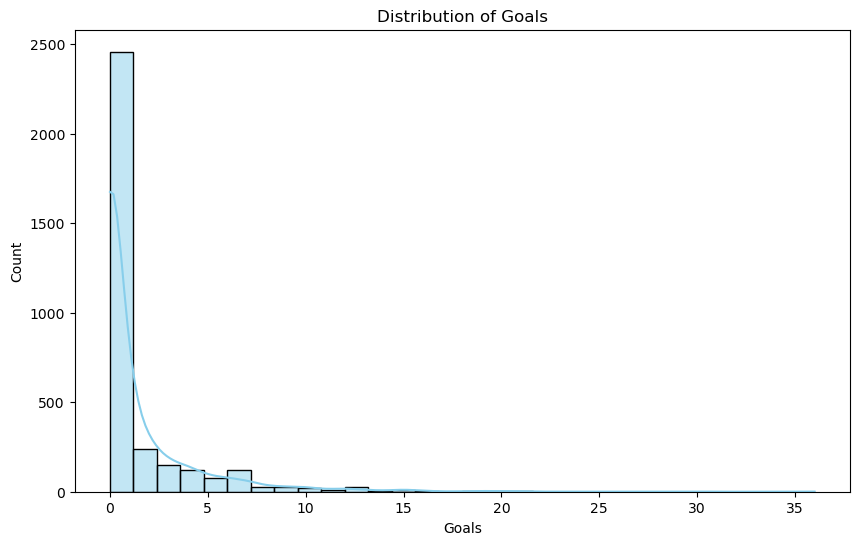

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data['Goals'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()

__Goals vs Assists Scatter Plot:__ This scatter plot illustrates the relationship between the number of goals and the number of assists for each player. By plotting these two variables, it becomes possible to discern any potential correlation or trend between scoring goals and assisting in goals. This visualization helps in understanding whether players who score more goals also tend to assist more frequently, and vice versa.

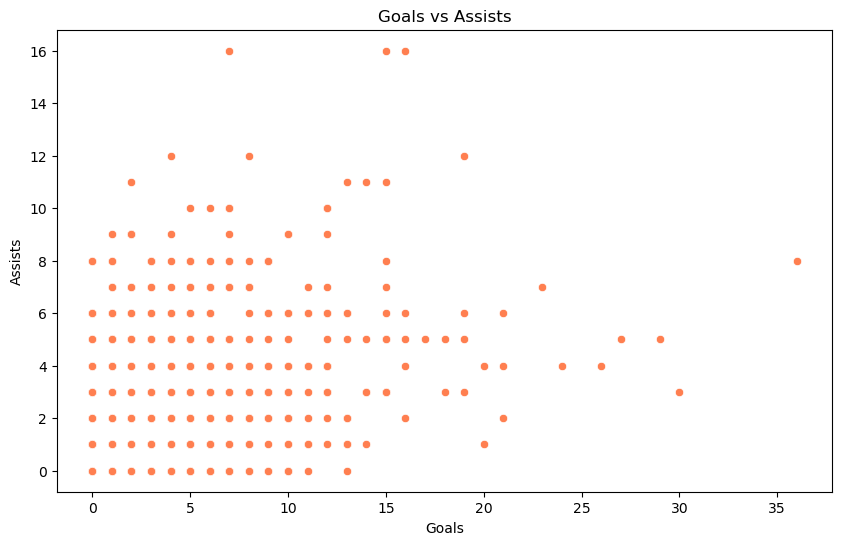

In [47]:
# Scatter plot of goals vs assists
plt.figure(figsize=(10,6))
sns.scatterplot(x='Goals', y='Assists', data=data, color='coral')
plt.title('Goals vs Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()

__Yellow Cards by Position Bar Plot:__ This bar plot showcases the average number of yellow cards received by players in different positions. By comparing the yellow card frequency across various positions, this graph aids in identifying which positions tend to receive more or fewer yellow cards on average, providing insights into the disciplinary tendencies of different player roles.

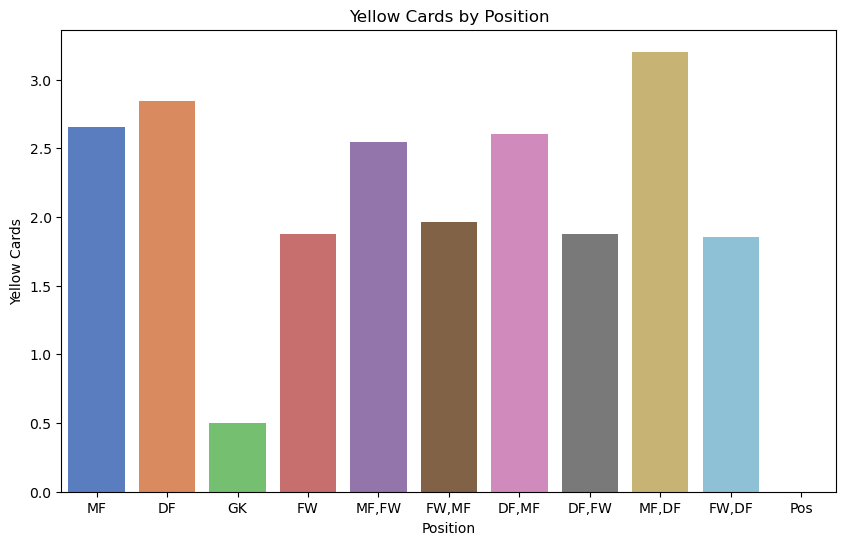

In [48]:
# Bar plot of yellow cards by position
plt.figure(figsize=(10,6))
sns.barplot(x='Position', y='Yellow_Cards', data=data, ci=None, palette='muted')
plt.title('Yellow Cards by Position')
plt.xlabel('Position')
plt.ylabel('Yellow Cards')
plt.show()

__Correlation Matrix Heatmap:__ The heatmap presents a correlation matrix that highlights the relationships between different numerical variables in the dataset. The color intensity and numerical values in the heatmap indicate the strength and direction of the correlations. This visualization assists in understanding the interdependencies between different statistical attributes such as goals, assists, saves, and other player performance metrics, providing valuable insights into the connections and associations within the data.

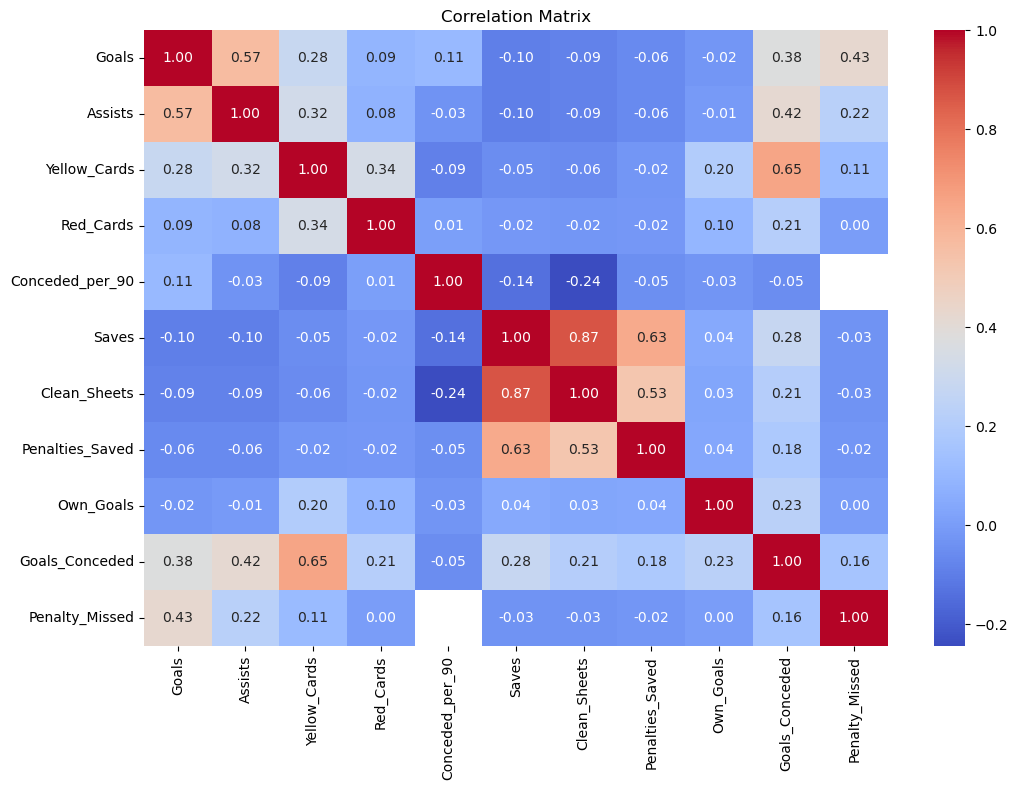

In [49]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data Analysis

Now that we possess a comprehensive dataframe encompassing all the necessary statistics to ascertain the top performers in the Fantasy Premier League, we can initiate our analysis. As previously stated, we will proceed with the analysis systematically, focusing on each position individually. This approach ensures that we accurately assess the impact of each statistic on our overall scoring system, preventing any misinterpretation of the significance of player performance in our evaluation.

### Goalkeeper Analysis

Before commencing our analysis for the goalkeepers, it's crucial to recall the criteria used for assessing the performance of goalkeepers in the game. Provided below are the essential statistics considered for evaluating goalkeepers in the Fantasy Premier League.

- Clean Sheets
- Saves
- Penalty Saves
- Goals Conceded
- Yellow Card
- Red Card
- Own Goal

In [50]:
# Creating our dataframe for goalkeepers
gk_df = data[data['Position'] == 'GK']

Formula we are going to use to find the points for each goalkeeper:

- (Goals * 6) + (Assists * 3) + (Clean Sheet * 4) + (Saves * (1/3)) + (Penalties Saved * 5) - (Goals Conceded * (1/2)) - (Yellow Cards * 1) - (Red Cards * 3) - (Own Goals * 2)

In [51]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
gk_df_copy = gk_df.copy()

# Perform operations on the copy
gk_df_copy.loc[:, 'Points'] = (gk_df_copy['Goals'] * 6) + (gk_df_copy['Assists'] * 3) + (gk_df_copy['Clean_Sheets'] * 4)
gk_df_copy.loc[:, 'Points'] = gk_df_copy['Points'] + (gk_df_copy['Saves'] / 3) + (gk_df_copy['Penalties_Saved'] * 5)
gk_df_copy.loc[:, 'Points'] = gk_df_copy['Points'] - (gk_df_copy['Goals_Conceded'] / 2) - (gk_df_copy['Yellow_Cards'])
gk_df_copy.loc[:, 'Points'] = gk_df_copy['Points'] - (gk_df_copy['Red_Cards'] * 3) - (gk_df_copy['Own_Goals'] * 2)

# After operations, we can reassign the modified copy back to the original DataFrame if needed
gk_df = gk_df_copy

In [52]:
gk_df.sort_values(by='Points', ascending=False, inplace=True)

In [53]:
gk_df[['Name', 'Team', 'Points']].head(20).reset_index(drop=True)

,Name,Team,Points
0,Marc-André ter Stegen,Barcelona,122.666667
1,Ivan Provedel,Lazio,101.000000
2,David Soria,Getafe,87.166667
3,David de Gea,Manchester Utd,84.500000
4,Álex Remiro,Real Sociedad,79.500000
5,Alex Meret,Napoli,79.000000
6,Alisson,Liverpool,76.500000
7,Brice Samba,Lens,75.666667
8,Yehvann Diouf,Reims,74.166667
9,Gianluigi Donnarumma,Paris S-G,74.000000


The aforementioned goalkeepers represent the top performers in terms of Fantasy Premier League point distribution. Opting for those currently active in the Premier League can significantly enhance your prospects within the Fantasy Premier League competition.

For example, you can safely go for __Alisson, David Raya, Nick Pope, or Aaron Ramsdale__.

### Defender Analysis

To identify the most effective defenders in the Fantasy Premier League, it is crucial to examine the point distribution specifically for defenders.

Defenders
- Goals
- Assists
- Goals Conceded
- Yellow Card
- Red Card
- Own Goal

In [54]:
# Creating the dataframe for the defenders
def_df = data[data['Position'] == 'DF']

Formula we are going to use to find the points for each defender:
(Goals * 6) + (Assists * 3) - (Goals Conceded * (1/2)) - (Yellow Cards * 1) - (Red Cards * 3) - (Own Goals * 2)

In [55]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
def_df_copy = def_df.copy()

# Perform operations on the copy
def_df_copy.loc[:, 'Points'] = (def_df_copy['Goals'] * 6) + (def_df_copy['Assists'] * 3)
def_df_copy.loc[:, 'Points'] = def_df_copy['Points'] - (def_df_copy['Goals_Conceded'] / 2)
def_df_copy.loc[:, 'Points'] = def_df_copy['Points'] - (def_df_copy['Yellow_Cards'])
def_df_copy.loc[:, 'Points'] = def_df_copy['Points'] - (def_df_copy['Red_Cards'] * 3) - (def_df_copy['Own_Goals'] * 2)

# After operations, we can reassign the modified copy back to the original DataFrame if needed
def_df = def_df_copy

In [56]:
def_df.sort_values(by='Points', ascending=False, inplace=True)

In [57]:
def_df[['Name', 'Team', 'Points']][10:30].reset_index(drop=True)

,Name,Team,Points
0,Nuno Mendes,Paris S-G,14.0
1,Sead Kolašinac,Marseille,13.0
2,Alejandro Balde,Barcelona,12.5
3,Trent Alexander-Arnold,Liverpool,12.0
4,Tyronne Ebuehi,Empoli,12.0
5,Robert Skov,Hoffenheim,12.0
6,Chancel Mbemba,Marseille,11.5
7,Éder Militão,Real Madrid,11.5
8,Juan Miranda,Betis,11.0
9,Josip Juranović,Union Berlin,10.5


These highlighted defenders exemplify outstanding performance in terms of point distribution within the Fantasy Premier League. Opting for those currently engaged in the Premier League can notably boost your chances in the Fantasy Premier League competition. For instance, you might consider selecting players like __Trent Alexander-Arnold or Destiny Udogie__.

### Midfielder Analysis

In order to pinpoint the most impactful midfielders in the Fantasy Premier League, it is essential to analyze the point allocation that pertains specifically to midfielders.

Midfielders
- Goals
- Assists
- Penalty Miss
- Yellow Card
- Red Card
- Own Goal

In [58]:
# Creating the dataframe for the midfielders
mid_df = data[data['Position'].str.contains('MF')]

Formula we are going to use to find the points for each midfielder: (Goals * 5) + (Assists * 3) - (Penalties Missed * 2) - (Yellow Cards * 1) - (Red Cards * 3) - (Own Goals * 2)

In [59]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
mid_df_copy = mid_df.copy()

# Perform operations on the copy
mid_df_copy.loc[:, 'Points'] = (mid_df_copy['Goals'] * 5) + (mid_df_copy['Assists'] * 3)
mid_df_copy.loc[:, 'Points'] = mid_df_copy['Points'] - (mid_df_copy['Penalty_Missed'] * 2)
mid_df_copy.loc[:, 'Points'] = mid_df_copy['Points'] - (mid_df_copy['Yellow_Cards'])
mid_df_copy.loc[:, 'Points'] = mid_df_copy['Points'] - (mid_df_copy['Red_Cards'] * 3) - (mid_df_copy['Own_Goals'] * 2)

# After operations, we can reassign the modified copy back to the original DataFrame if needed
mid_df = mid_df_copy

In [60]:
mid_df.sort_values(by='Points', ascending=False, inplace=True)

In [61]:
mid_df[['Name', 'Team', 'Points']][:30].reset_index(drop=True)

,Name,Team,Points
0,Lionel Messi,Paris S-G,128.0
1,Antoine Griezmann,Atlético Madrid,121.0
2,Boulaye Dia,Salernitana,94.0
3,Martin Ødegaard,Arsenal,92.0
4,Neymar,Paris S-G,89.0
5,Jamal Musiala,Bayern Munich,89.0
6,Rafael Leão,Milan,89.0
7,Vincenzo Grifo,Freiburg,86.0
8,Christopher Nkunku,RB Leipzig,86.0
9,Serge Gnabry,Bayern Munich,85.0


These highlighted midfielders showcase exceptional performance when it comes to the allocation of points in the Fantasy Premier League. Opting for those presently active in the Premier League can significantly enhance your prospects in the Fantasy Premier League competition. For example, you might contemplate selecting players such as __Ødegaard, Kevin De Bruyne, Son Heung-min, James Maddison, or Moussa Diaby__.

### Forward Analysis

To identify the most influential forwards in the Fantasy Premier League, it is crucial to analyze the point distribution that specifically relates to forwards.

Forwards
- Goals
- Assists
- Penalty Miss
- Yellow Card
- Red Card
- Own Goal

In [62]:
# Creating the dataframe for the forwards
for_df = data[data['Position'] == 'FW']

Formula we are going to use to find the points for each forward: (Goals * 4) + (Assists * 3) - (Penalties Missed * 2) - (Yellow Cards * 1) - (Red Cards * 3) - (Own Goals * 2)

In [63]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
for_df_copy = for_df.copy()

# Perform operations on the copy
for_df_copy.loc[:, 'Points'] = (for_df_copy['Goals'] * 4) + (for_df_copy['Assists'] * 3)
for_df_copy.loc[:, 'Points'] = for_df_copy['Points'] - (for_df_copy['Penalty_Missed'] * 2)
for_df_copy.loc[:, 'Points'] = for_df_copy['Points'] - (for_df_copy['Yellow_Cards'])
for_df_copy.loc[:, 'Points'] = for_df_copy['Points'] - (for_df_copy['Red_Cards'] * 3) - (for_df_copy['Own_Goals'] * 2)

# After operations, we can reassign the modified copy back to the original DataFrame if needed
for_df = for_df_copy

In [64]:
for_df.sort_values(by='Points', ascending=False, inplace=True)

In [65]:
for_df[['Name', 'Team', 'Points']][:20].reset_index(drop=True)

,Name,Team,Points
0,Erling Haaland,Manchester City,163.0
1,Kylian Mbappé,Paris S-G,121.0
2,Harry Kane,Tottenham,121.0
3,Alexandre Lacazette,Lyon,116.0
4,Victor Osimhen,Napoli,110.0
5,Mohamed Salah,Liverpool,106.0
6,Robert Lewandowski,Barcelona,104.0
7,Jonathan David,Lille,100.0
8,Lautaro Martínez,Inter,97.0
9,Loïs Openda,Lens,94.0


These highlighted midfielders demonstrate exceptional proficiency in accruing points within the Fantasy Premier League. Opting for those currently participating in the Premier League can substantially improve your prospects in the Fantasy Premier League competition. For instance, you might consider selecting players like __Haaland, Salah, Callum Wilson, or Ivan Toney__.

## Conclusion

In conclusion, the Fantasy Premier League (FPL) has emerged as a prominent interactive platform with a vast community of over 11.5 million enthusiasts in 2023. Owned and operated by the Premier League itself, this game offers an engaging experience for football fans, allowing them to create and manage their own virtual teams. Our data analysis project has focused on identifying the most promising players for fantasy football teams, utilizing a comprehensive evaluation of player performance statistics from the previous season. By systematically exploring various statistical metrics, we have gained valuable insights into the top-performing goalkeepers, defenders, midfielders, and forwards within the FPL.

Through a thorough examination of key player attributes and performance indicators, we have highlighted the significance of selecting players who demonstrate exceptional proficiency in goal-scoring, assisting, and defensive contributions. Our analysis has emphasized the importance of understanding specific position-based metrics, such as clean sheets, saves, penalties saved, and goals conceded, in order to make informed decisions when selecting players for each position. By leveraging a meticulous approach to data analysis, we have provided valuable recommendations for players to consider when assembling their fantasy football teams, ensuring a strategic and competitive advantage in the FPL competition.

---
With an extensive focus on player statistics, performance metrics, and strategic insights, our project serves as a valuable resource for enthusiasts seeking to optimize their team compositions and maximize their chances of success in the Fantasy Premier League. By considering the recommendations and analysis presented here, participants can make informed decisions and build well-balanced teams that are primed for success in the dynamic and competitive landscape of the Fantasy Premier League.